# Multi-Output Regression

We are building a model with which to forecast future periods based on prior data.
We use CS_Index as our dependent variable, and predict its value.

1. Read the data set.
2. Create predictor columns:
   - Since we have historical time series set, we use the data in the next period 
       for the "future" data in the current period  
       - 1 month in future, based on the next CS_Index period value 
       - 4 months in the future, similar to above
       - Same for 7 months and 13 months
   - This gives us next month, next quarter, next half, and next year values.
3. Split data into training and testing data.
4. Scale the data. Our values have a wide range.
5. Use multioutput regresion with elasticnet as estimator
6. Fit the data to the model
7. Print RMSE values
8. Plot Residuals for 1 month, 4 month, 7 month, and 13 month (optional, for our edification)
9. Save the model. 
10. We can use model.predict to get forecasted values. A visualization might include plot of historical data, along with predicted values n periods into the future.
11. Fancy: use box plot to show margin of error



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# Read the data set.
df = pd.read_csv("../Data/dataset.csv")
df.head()

,period,CS_Index,West North Central,New England,East North Central,Middle Atlantic,Mountain,Pacific,South Atlantic,West South Central,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio
0,2000-January,100.589697,151.57,127.99,150.48,118.85,165.07,122.51,133.79,139.65,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320
1,2000-February,101.692479,152.74,127.91,149.71,118.42,165.48,121.47,134.19,139.50,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317
2,2000-March,102.783829,153.15,129.86,151.06,119.62,166.34,123.09,134.77,140.74,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313
3,2000-April,103.996444,154.52,131.19,151.77,120.61,166.87,123.86,135.89,141.43,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310
4,2000-May,105.252818,154.98,132.91,152.17,121.02,167.46,125.02,136.52,141.90,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523


In [3]:
# Let's ignore the regional data
df = df.drop(columns = ['West North Central','New England','East North Central','Middle Atlantic','Mountain','Pacific','South Atlantic','West South Central'])
df.head()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio
0,2000-January,100.589697,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320
1,2000-February,101.692479,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317
2,2000-March,102.783829,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313
3,2000-April,103.996444,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310
4,2000-May,105.252818,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523


Create predictor columns

In [4]:
# Next month column, create current value based on CS_index next value (current "next month prediction" based on actual next month value)
next_month = df['CS_Index'].shift(-1, axis=0)
df['CS_1_month'] = next_month
df.head()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month
0,2000-January,100.589697,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320,101.692479
1,2000-February,101.692479,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317,102.783829
2,2000-March,102.783829,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313,103.996444
3,2000-April,103.996444,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310,105.252818
4,2000-May,105.252818,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523,106.402524


In [5]:
# Next quarter, or four months
next_quarter = df['CS_Index'].shift(-4, axis=0)
df['CS_4_month'] = next_quarter
df.head()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month
0,2000-January,100.589697,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320,101.692479,105.252818
1,2000-February,101.692479,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317,102.783829,106.402524
2,2000-March,102.783829,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313,103.996444,107.134019
3,2000-April,103.996444,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310,105.252818,107.861438
4,2000-May,105.252818,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523,106.402524,108.610140


In [6]:
# Next half, or 7 months
next_half = df['CS_Index'].shift(-7, axis=0)
df['CS_7_month'] = next_half 
df.head()


,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month
0,2000-January,100.589697,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320,101.692479,105.252818,107.861438
1,2000-February,101.692479,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317,102.783829,106.402524,108.610140
2,2000-March,102.783829,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313,103.996444,107.134019,109.486859
3,2000-April,103.996444,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310,105.252818,107.861438,110.571707
4,2000-May,105.252818,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523,106.402524,108.610140,111.800872


In [7]:
# 13 months, for one year from now
next_year = df['CS_Index'].shift(-13, axis=0)
df['CS_13_month'] = next_year
df.head(14)

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month,CS_13_month
0,2000-January,100.589697,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320,101.692479,105.252818,107.861438,114.126858
1,2000-February,101.692479,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317,102.783829,106.402524,108.610140,115.085196
2,2000-March,102.783829,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313,103.996444,107.134019,109.486859,115.840551
3,2000-April,103.996444,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310,105.252818,107.861438,110.571707,116.300743
4,2000-May,105.252818,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523,106.402524,108.610140,111.800872,116.899750
5,2000-June,106.402524,140.82,118.4,71.0,4.0,16.757520,6.132995,11.777730,5.644737,107.134019,109.486859,113.053498,117.496601
6,2000-July,107.134019,141.58,117.0,76.0,4.0,16.806757,6.177676,11.836625,5.658950,107.861438,110.571707,114.126858,118.245229
7,2000-August,107.861438,142.12,119.3,73.0,4.1,16.890217,6.232203,11.912198,5.679996,108.610140,111.800872,115.085196,119.027953
8,2000-September,108.610140,143.03,120.3,70.0,3.9,16.973676,6.286730,11.987772,5.701042,109.486859,113.053498,115.840551,119.694049
9,2000-October,109.486859,143.81,124.6,71.0,3.9,17.057136,6.341257,12.063345,5.722088,110.571707,114.126858,116.300743,120.274744


In [8]:
df.tail()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month,CS_13_month
221,2018-June,211.324397,263.68,137.7,56.0,4.0,15.328434,5.610062,9.855333,4.245272,211.607529,213.479024,NaN,NaN
222,2018-July,211.607529,264.87,140.3,52.0,3.9,15.328742,5.618410,9.857297,4.238888,211.112328,NaN,NaN,NaN
223,2018-August,211.112328,266.18,142.3,47.0,3.8,15.327507,5.623304,9.865548,4.242244,212.681557,NaN,NaN,NaN
224,2018-September,212.681557,266.95,147.5,46.0,3.7,15.326273,5.628199,9.873798,4.245599,213.479024,NaN,NaN,NaN
225,2018-October,213.479024,268.27,147.1,43.0,3.8,15.325038,5.633093,9.882049,4.248955,NaN,NaN,NaN,NaN


In [9]:
# We should save those non-NaN values before we drop them. They'll come in handy later.
df_oct2018 = df
# Drop the NaNs
df.dropna(axis=0,inplace=True)

In [10]:
df.tail()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month,CS_13_month
208,2017-May,198.126617,245.77,157.2,57.0,4.4,15.525349,5.656255,9.984194,4.327939,198.725571,202.133162,205.896187,211.324397
209,2017-June,198.725571,246.48,147.8,56.0,4.3,15.517216,5.656457,9.979874,4.323418,199.760367,203.357326,207.317264,211.607529
210,2017-July,199.760367,248.00,151.2,48.0,4.3,15.509082,5.656659,9.975555,4.318896,199.984586,204.695198,208.785257,211.112328
211,2017-August,199.984586,249.88,153.9,45.0,4.4,15.495432,5.659247,9.967493,4.308246,202.133162,205.896187,210.857946,212.681557
212,2017-September,202.133162,251.02,160.1,50.0,4.2,15.481781,5.661836,9.959432,4.297596,203.357326,207.317264,210.394373,213.479024


Data Preprocessing

In [11]:
# Set up our variables. 
# Y axis is our predictions
# 
Y = df[['CS_1_month','CS_4_month','CS_7_month','CS_13_month']]
X = df.drop(columns= ['period','CS_1_month','CS_4_month','CS_7_month','CS_13_month'])

In [12]:
print("Shape: ", X.shape, Y.shape)

Shape:  (213, 9) (213, 4)


In [13]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [14]:
# Do some scaling to normalize the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
Y_scaler = StandardScaler().fit(Y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
Y_train_scaled = Y_scaler.transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)

In [15]:
# We're using ElasticNet to create an estimator to use within MultiOutputRegressor 
# We were originally gonna use a Multi-variate LinearRegression.

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
#model = MultiOutputRegressor(LinearRegression())
model = MultiOutputRegressor(ElasticNet())

In [16]:
# Fit the model and get the score
model.fit(X_train,Y_train)
training_score = model.score(X_train,Y_train)
testing_score = model.score(X_test,Y_test)

In [17]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9669832895131317
Testing Score: 0.9653676459193321


Plot Residuals for 1 month, 4 month, 7 month, and 13 month (optional, for our edification)   
Maybe later....

In [18]:
df.tail()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month,CS_13_month
208,2017-May,198.126617,245.77,157.2,57.0,4.4,15.525349,5.656255,9.984194,4.327939,198.725571,202.133162,205.896187,211.324397
209,2017-June,198.725571,246.48,147.8,56.0,4.3,15.517216,5.656457,9.979874,4.323418,199.760367,203.357326,207.317264,211.607529
210,2017-July,199.760367,248.00,151.2,48.0,4.3,15.509082,5.656659,9.975555,4.318896,199.984586,204.695198,208.785257,211.112328
211,2017-August,199.984586,249.88,153.9,45.0,4.4,15.495432,5.659247,9.967493,4.308246,202.133162,205.896187,210.857946,212.681557
212,2017-September,202.133162,251.02,160.1,50.0,4.2,15.481781,5.661836,9.959432,4.297596,203.357326,207.317264,210.394373,213.479024


In [19]:
#df['period'] = pd.to_datetime(df['period'])
#f.set_index('period',inplace=True)
#df.reset_index(inplace=True,drop=False)

In [20]:
#future_dates = pd.date_range(start=df['period'].max(), freq='MS', periods = 13)

In [21]:
end_month = df.iloc[-1, 0]
end_month

'2017-September'

In [22]:
df['period'].max()

'2017-September'

In [23]:
#df['period'] = pd.to_datetime(df['period'])
#next_month = df['period'].max() + relativedelta(months=+1)
#next_month

In [24]:
df.tail(2)

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month,CS_13_month
211,2017-August,199.984586,249.88,153.9,45.0,4.4,15.495432,5.659247,9.967493,4.308246,202.133162,205.896187,210.857946,212.681557
212,2017-September,202.133162,251.02,160.1,50.0,4.2,15.481781,5.661836,9.959432,4.297596,203.357326,207.317264,210.394373,213.479024


In [25]:
# Saving this for later! Create a series of future dates based on last period in the dataframe.
#from dateutil.relativedelta import relativedelta
#next_month = df['period'].max() + relativedelta(months=+1)
#next_month
#months = [df['period'].max() + relativedelta(months=+y) for y in range(1,24)]

In [26]:
df.tail()

,period,CS_Index,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,Financial obligations ratio,Consumer debt service ratio,Debt service ratio,Mortgage debt service ratio,CS_1_month,CS_4_month,CS_7_month,CS_13_month
208,2017-May,198.126617,245.77,157.2,57.0,4.4,15.525349,5.656255,9.984194,4.327939,198.725571,202.133162,205.896187,211.324397
209,2017-June,198.725571,246.48,147.8,56.0,4.3,15.517216,5.656457,9.979874,4.323418,199.760367,203.357326,207.317264,211.607529
210,2017-July,199.760367,248.00,151.2,48.0,4.3,15.509082,5.656659,9.975555,4.318896,199.984586,204.695198,208.785257,211.112328
211,2017-August,199.984586,249.88,153.9,45.0,4.4,15.495432,5.659247,9.967493,4.308246,202.133162,205.896187,210.857946,212.681557
212,2017-September,202.133162,251.02,160.1,50.0,4.2,15.481781,5.661836,9.959432,4.297596,203.357326,207.317264,210.394373,213.479024


In [27]:
y_prediction_last = model.predict(np.array(X.iloc[-1,:]).reshape(1,-1))

In [28]:
y_prediction_last

array([[202.98081055, 205.63300576, 208.91388285, 214.17929771]])

In [29]:
y_prediction_all = model.predict(X)

In [30]:
y_prediction_all_df = pd.DataFrame(y_prediction_all,columns=['1M','4M','7M','13M'])
y_prediction_all_df['period']=df['period']
y_prediction_all_df.tail()


,1M,4M,7M,13M,period
208,199.222238,202.724187,206.826398,213.600466,2017-May
209,199.477433,202.061708,205.207470,210.195197,2017-June
210,200.204481,201.823634,203.995689,207.286894,2017-July
211,200.417743,201.875387,203.988268,207.263533,2017-August
212,202.980811,205.633006,208.913883,214.179298,2017-September


In [31]:
csvfile = "../Data/forecasted_data.csv"
y_prediction_all_df.to_csv(csvfile, header=True, index=False)

import json
y_dict = y_prediction_all_df.to_dict(orient='records')
jsonfile = "../app/forecasted_data.json"
with open(jsonfile, 'w') as fp:
    json.dump(y_dict, fp)

In [32]:
y_prediction_all.shape

(213, 4)

Text(0.5,1,'Residual Plot')

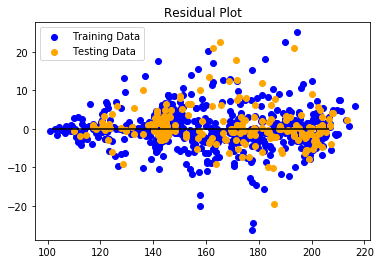

In [33]:
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=Y.min(), xmax=Y.max())
plt.title("Residual Plot")

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(Y_test, predicted)
r2 = r2_score(Y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")   

Mean Squared Error (MSE): 25.405959943174306
R-squared (R2 ): 0.9653676459193321


In [35]:
# Save the model. I'm Pickle Rick!
import pickle 
file = "../app/multi_regressor_model.pkl"
with open(file, 'wb')as f:
    pickle.dump(model, f)

In [36]:
# How to load the model later.
model_pkl = open("multi_regressor_model.pkl", 'rb')
loaded_model = pickle.load(model_pkl)